## Feature Engineering & Encoding

In [1]:
# Import the libraries needed

import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import time


C:\Users\Ingli\anaconda3\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\Ingli\anaconda3\Lib\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


In [2]:
# ******************************************************
# TWO CHANGES NEED TO BE MADE TO THIS NOTEBOOK IF 'RACE'
# ATTRIBUTE IS REMOVED
# ******************************************************

In [3]:
# Read in the dataset passed from the last module

data = pd.read_csv('Mod_2_data_to_pass.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99343 entries, 0 to 99342
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    99343 non-null  object
 1   age                       99343 non-null  object
 2   admission_type_id         99343 non-null  object
 3   discharge_disposition_id  99343 non-null  int64 
 4   time_in_hospital          99343 non-null  int64 
 5   num_lab_procedures        99343 non-null  int64 
 6   num_procedures            99343 non-null  int64 
 7   num_medications           99343 non-null  int64 
 8   number_outpatient         99343 non-null  int64 
 9   number_emergency          99343 non-null  int64 
 10  number_inpatient          99343 non-null  int64 
 11  diag_1                    99323 non-null  object
 12  diag_2                    98987 non-null  object
 13  diag_3                    97924 non-null  object
 14  number_diagnoses      

In [5]:
# Change data types to categories

cat_list = ['gender', 'age', 'admission_type_id', 'discharge_disposition_id',
            'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'change',
           'diabetesMed', 'readmitted', 'Meglitinides', 'Thiazolidinediones',
           'Sulfonylureas', 'AG_Inhibitors', 'Metformin', 'Insulin', 'Admission_Source']

#cat_list.append('race')

for item in cat_list:
    data[item] = data[item].astype('category')
    


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99343 entries, 0 to 99342
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   gender                    99343 non-null  category
 1   age                       99343 non-null  category
 2   admission_type_id         99343 non-null  category
 3   discharge_disposition_id  99343 non-null  category
 4   time_in_hospital          99343 non-null  int64   
 5   num_lab_procedures        99343 non-null  int64   
 6   num_procedures            99343 non-null  int64   
 7   num_medications           99343 non-null  int64   
 8   number_outpatient         99343 non-null  int64   
 9   number_emergency          99343 non-null  int64   
 10  number_inpatient          99343 non-null  int64   
 11  diag_1                    99323 non-null  category
 12  diag_2                    98987 non-null  category
 13  diag_3                    97924 non-null  cate

## One Hot Encoding

In [7]:
# ONE HOT ENCODING IN A LOOP
# DRUGS NOT INCLUDED
# USE ONE-HOT ENCODING TO BINARIZE CATEGORICAL ATTRIBUTES


# Create one hot encoder (start the tool)
# ?? Don't understand what 'sparse_output = False' does
encoder = OneHotEncoder(sparse_output = False, dtype = np.int)

# Create a new dataframe to store the one-hot encoded data
encoded_dataframes = []

# Create a list of all the categorical columns to be one-hot encoded
cat_columns = ['gender', 'age', 'admission_type_id', 
               'discharge_disposition_id', 'max_glu_serum', 'A1Cresult', 
               'Meglitinides', 'Thiazolidinediones', 'Sulfonylureas', 
               'AG_Inhibitors', 'Metformin', 'Insulin', 'change', 
               'diabetesMed', 'readmitted', 'Admission_Source']

#cat_columns.append('race')

for column in cat_columns:
    # Get data to be encoded from original dataset
    column_data = data[[column]]
    
    # Use the encoder
    encoded_data = encoder.fit_transform(column_data)
    
    # Create a temporary dataframe to hold encoded data
    temp_encoded_data = pd.DataFrame(encoded_data, columns = encoder.get_feature_names_out([column]))
    
    # Add the encoded dataframe to the list created above
    encoded_dataframes.append(temp_encoded_data)

# Concat all the encoded dataframes in the temp_encoded_data list
completed_dataframe = pd.concat(encoded_dataframes, axis = 1)

# Remove the original columns from test3
data_copy = data.copy()
data_copy = data_copy.drop(cat_columns, axis = 1)

    
# Put the remaining original data columns together with the encoded dataframe
data = pd.concat([data_copy, completed_dataframe], axis=1)

C:\Users\Ingli\AppData\Local\Temp\ipykernel_8796\3445418309.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  encoder = OneHotEncoder(sparse_output = False, dtype = np.int)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99343 entries, 0 to 99342
Data columns (total 83 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   time_in_hospital                 99343 non-null  int64   
 1   num_lab_procedures               99343 non-null  int64   
 2   num_procedures                   99343 non-null  int64   
 3   num_medications                  99343 non-null  int64   
 4   number_outpatient                99343 non-null  int64   
 5   number_emergency                 99343 non-null  int64   
 6   number_inpatient                 99343 non-null  int64   
 7   diag_1                           99323 non-null  category
 8   diag_2                           98987 non-null  category
 9   diag_3                           97924 non-null  category
 10  number_diagnoses                 99343 non-null  int64   
 11  gender_Female                    99343 non-null  int32   
 12  gend

## X and Y

In [9]:
# Create feature matrix X (independent variables) and target matrix Y (dependent variables)

In [10]:
# Separate dataset into independent variables and dependent variables
# X = indep var's = predictors = features
# Y = dep var's = target variables = what we want to predict

X = data.drop(columns=['readmitted_<30', 'readmitted_>30', 'readmitted_NO', 'diag_1', 'diag_2', 'diag_3'])

Y = pd.concat([data['readmitted_<30'], data['readmitted_>30'], data['readmitted_NO']], axis = 1)

display(X.head(2))
display(Y.head(2))

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,...,Insulin_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,Admission_Source_Emerg_Dept,Admission_Source_Missing,Admission_Source_Other,Admission_Source_Referral,Admission_Source_Transfer
0,1,41,0,1,0,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
1,3,59,0,18,0,0,0,9,1,0,...,0,1,0,0,1,1,0,0,0,0


,readmitted_<30,readmitted_>30,readmitted_NO
0,0,0,1
1,0,1,0


In [11]:
# Create a list of the attribute names

feature_names = X.columns.tolist()
feature_names

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'gender_Female',
 'gender_Male',
 'gender_Missing',
 'age_[0-10)',
 'age_[10-20)',
 'age_[20-30)',
 'age_[30-40)',
 'age_[40-50)',
 'age_[50-60)',
 'age_[60-70)',
 'age_[70-80)',
 'age_[80-90)',
 'age_[90-100)',
 'admission_type_id_Elective',
 'admission_type_id_Emergency',
 'admission_type_id_Missing',
 'admission_type_id_Trauma Centre',
 'admission_type_id_Urgent',
 'discharge_disposition_id_1',
 'discharge_disposition_id_2',
 'discharge_disposition_id_3',
 'discharge_disposition_id_4',
 'discharge_disposition_id_5',
 'discharge_disposition_id_6',
 'discharge_disposition_id_7',
 'discharge_disposition_id_8',
 'discharge_disposition_id_9',
 'discharge_disposition_id_12',
 'discharge_disposition_id_15',
 'discharge_disposition_id_16',
 'discharge_disposition_id_17',
 'discharge_disposition_id_22',
 'discharge_dispositio

## Variance Threshold

In [12]:
# Turn the VarianceThreshold tool on & specify the minimum 
# variance threshold
# The lower the threshold, the more features will be 
# considered for removal
selector = VarianceThreshold(threshold=0.01)

# Create high variance feature matrix
# Fit and transform the data
Xnew = selector.fit_transform(X)

# Get the indices of the features that were selected
selected_features_indices = selector.get_support(indices=True)

# Get the feature names with low variance
low_variance_features = [feature_names[i] for i in range(len(feature_names)) if i not in selected_features_indices]

# Print the low variance features
print("Low variance features to be dropped:", low_variance_features)

Low variance features to be dropped: ['gender_Missing', 'age_[0-10)', 'age_[10-20)', 'admission_type_id_Trauma Centre', 'discharge_disposition_id_4', 'discharge_disposition_id_7', 'discharge_disposition_id_8', 'discharge_disposition_id_9', 'discharge_disposition_id_12', 'discharge_disposition_id_15', 'discharge_disposition_id_16', 'discharge_disposition_id_17', 'discharge_disposition_id_23', 'discharge_disposition_id_24', 'discharge_disposition_id_27', 'discharge_disposition_id_28', 'Meglitinides_Adjusted', 'Thiazolidinediones_No', 'Thiazolidinediones_Steady', 'Sulfonylureas_No', 'Sulfonylureas_Steady', 'AG_Inhibitors_Adjusted', 'AG_Inhibitors_No', 'AG_Inhibitors_Steady', 'Metformin_No', 'Metformin_Steady', 'Admission_Source_Other']


In [13]:
len(low_variance_features)

27

In [14]:
# ********** MAY NOT WANT TO DO THIS CODE ************************

# Drop low variance features from dataset
X = X.drop(low_variance_features, axis=1)

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99343 entries, 0 to 99342
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   time_in_hospital              99343 non-null  int64
 1   num_lab_procedures            99343 non-null  int64
 2   num_procedures                99343 non-null  int64
 3   num_medications               99343 non-null  int64
 4   number_outpatient             99343 non-null  int64
 5   number_emergency              99343 non-null  int64
 6   number_inpatient              99343 non-null  int64
 7   number_diagnoses              99343 non-null  int64
 8   gender_Female                 99343 non-null  int32
 9   gender_Male                   99343 non-null  int32
 10  age_[20-30)                   99343 non-null  int32
 11  age_[30-40)                   99343 non-null  int32
 12  age_[40-50)                   99343 non-null  int32
 13  age_[50-60)                   9

## Highly Correlated Features

In [16]:
# Handling highly correlated attributes

# Create correlation matrix
correlation_matrix = X.corr()

# Identify highly correlated attribute pairs using a
# nested loop

# Initialize an empty set to store the names of pairs 
# of attributes that are highly correlated
highly_correlated = set()

# Can use 0.95 if a higher correlation threshold is desired
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j]) > 0.80:
            # if a highly correlated pair is identified, the next two
            # lines extract the names of the attributes involved
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]
            # adds a tuple of the highly correlated attributes
            # to the holding tank
            highly_correlated.add((feature_i, feature_j))
            
# Print the highly correlated feature pairs
print("Highly correlated feature paires:", highly_correlated)

Highly correlated feature paires: {('diabetesMed_Yes', 'diabetesMed_No'), ('gender_Male', 'gender_Female'), ('change_No', 'change_Ch'), ('Meglitinides_Steady', 'Meglitinides_No')}


In [17]:
# ************** MAY NOT WANT TO DO THIS CODE *************************************

# Drop features
to_drop = ['Meglitinides_No', 'change_No', 'gender_Male', 'diabetesMed_No']
#to_drop.append('race_Caucasian')
X.drop(columns=to_drop, axis = 1, inplace = True)

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99343 entries, 0 to 99342
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   time_in_hospital              99343 non-null  int64
 1   num_lab_procedures            99343 non-null  int64
 2   num_procedures                99343 non-null  int64
 3   num_medications               99343 non-null  int64
 4   number_outpatient             99343 non-null  int64
 5   number_emergency              99343 non-null  int64
 6   number_inpatient              99343 non-null  int64
 7   number_diagnoses              99343 non-null  int64
 8   gender_Female                 99343 non-null  int32
 9   age_[20-30)                   99343 non-null  int32
 10  age_[30-40)                   99343 non-null  int32
 11  age_[40-50)                   99343 non-null  int32
 12  age_[50-60)                   99343 non-null  int32
 13  age_[60-70)                   9

## Removing Irrelevant Features for Classification

In [19]:
y = Y['readmitted_<30']
#y.head(3)

In [20]:
# ****************************************************************
# THIS CODE DOESN'T CHANGE THE DATASET AT ALL ********************
# IT IS JUST INTERESTING *****************************************
# ****************************************************************

# Turn on the SelectKBest tool 
# f_classif is the default for score_func
selector = SelectKBest(score_func = f_classif, k=10)

# Fit and transform the data to select the top 'k' features
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_features_indices = selector.get_support(indices = True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_features_indices]

# Print the names of the selected attributes
print('Selected best features:', selected_feature_names)

Selected best features: Index(['time_in_hospital', 'num_medications', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'discharge_disposition_id_1',
       'discharge_disposition_id_3', 'discharge_disposition_id_22',
       'Insulin_Adjusted', 'Insulin_No'],
      dtype='object')


In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99343 entries, 0 to 99342
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   time_in_hospital              99343 non-null  int64
 1   num_lab_procedures            99343 non-null  int64
 2   num_procedures                99343 non-null  int64
 3   num_medications               99343 non-null  int64
 4   number_outpatient             99343 non-null  int64
 5   number_emergency              99343 non-null  int64
 6   number_inpatient              99343 non-null  int64
 7   number_diagnoses              99343 non-null  int64
 8   gender_Female                 99343 non-null  int32
 9   age_[20-30)                   99343 non-null  int32
 10  age_[30-40)                   99343 non-null  int32
 11  age_[40-50)                   99343 non-null  int32
 12  age_[50-60)                   99343 non-null  int32
 13  age_[60-70)                   9

## Feature Importance from Tree-Based Models

In [22]:
# Time how long this code takes to run
start_time = time.time()

# Train a random forest classifier
classifier = RandomForestClassifier()
classifier.fit(X, Y)

# Get feature importance scores
important_features = classifier.feature_importances_

# Get feature names from your dataset
feature_names = X.columns

# Create a dataframe to associate feature names with their importance scores
feature_importance_df = pd.DataFrame({'Feature' : feature_names, 'Importance' : important_features})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending = False)

end_time = time.time()
elapsed_time = end_time - start_time
print(f'Time taken: {elapsed_time} seconds')

Time taken: 24.15516710281372 seconds


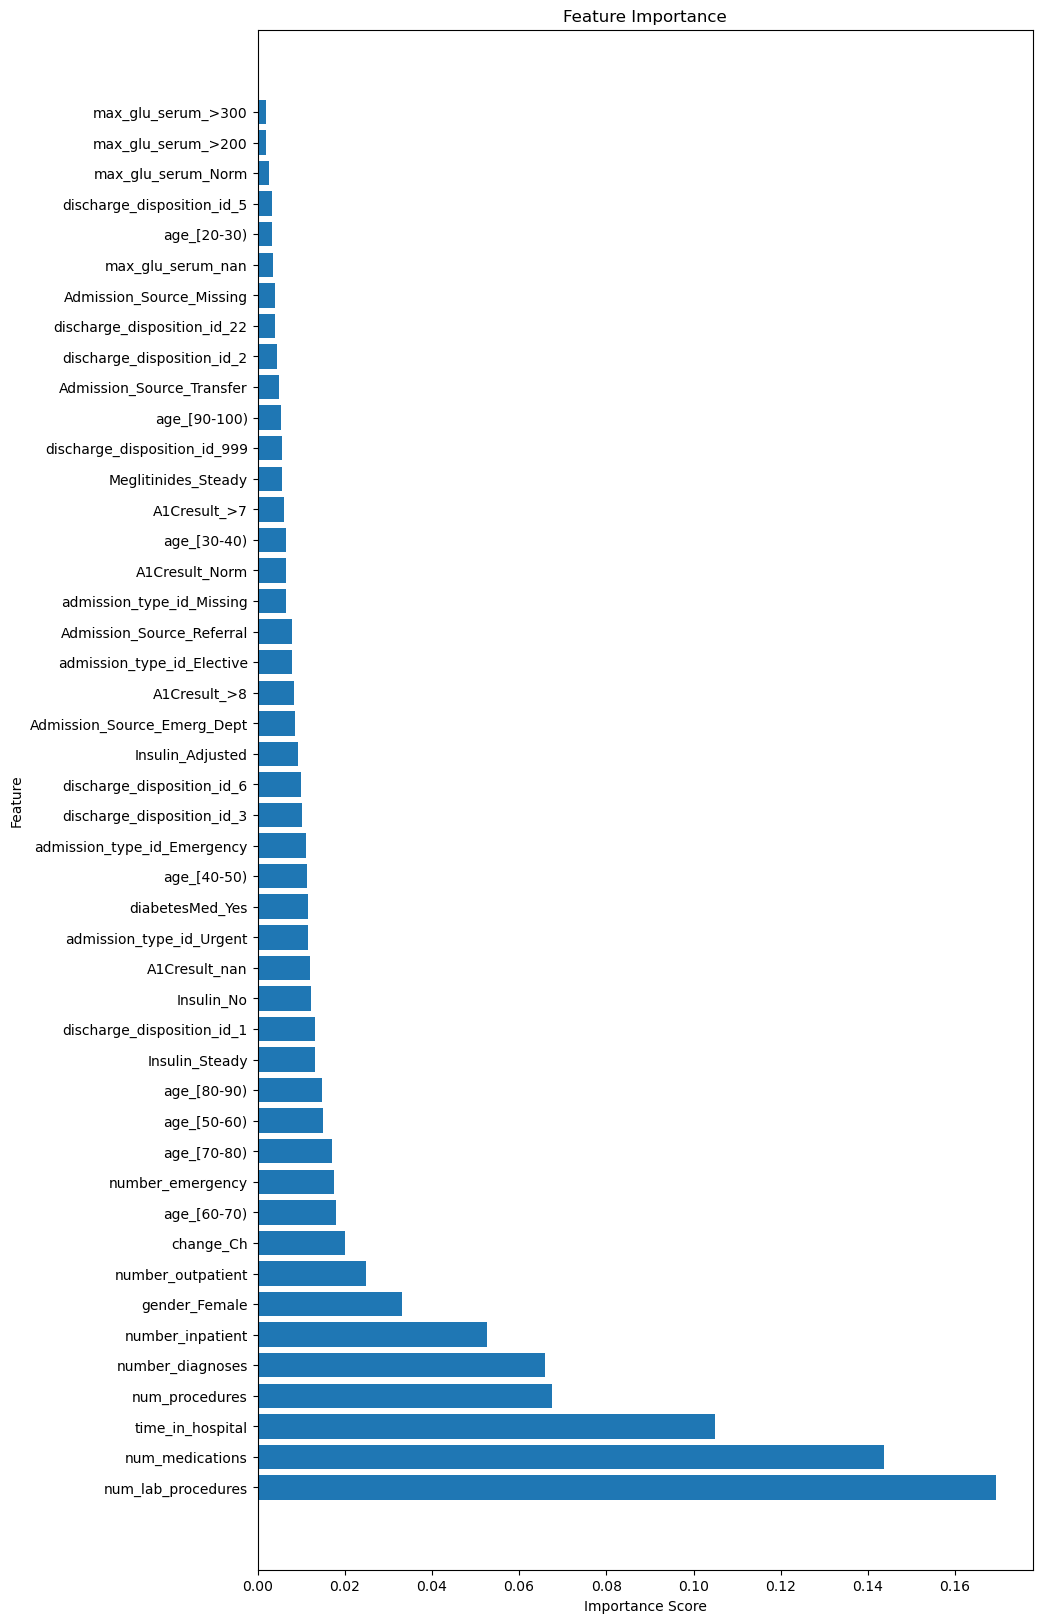

In [23]:
# ***************** THIS CODE DOESN'T CHANGE THE DATASET ************************

# Visualize the feature importance scores

plt.figure(figsize=(10,20))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

## Recursive Feature Elimination

In [24]:
# ************** THIS CODE DOESN'T CHANGE THE DATASET ******************

start_time = time.time()

# Create a decision tree classifier
base_model = DecisionTreeClassifier()

# Set up the RFE model with the desired number of features
rfe = RFE(estimator = base_model, n_features_to_select = 25)
X_RFE = rfe.fit_transform(X, Y)

# Get the mask of selected features
selected_feature_indices = rfe.support_

# Get the selected feature names from the original dataframe
selected_features = X.columns[selected_feature_indices]

# Print the selected features
print('Selected features:', selected_features)

end_time = time.time()
elapsed_time = end_time - start_time
print(f'Time taken: {elapsed_time} seconds')

Selected features: Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'gender_Female', 'age_[40-50)',
       'age_[50-60)', 'age_[60-70)', 'age_[70-80)', 'age_[80-90)',
       'admission_type_id_Emergency', 'admission_type_id_Urgent',
       'discharge_disposition_id_3', 'A1Cresult_>8', 'A1Cresult_nan',
       'Insulin_Adjusted', 'Insulin_No', 'Insulin_Steady', 'change_Ch',
       'diabetesMed_Yes', 'Admission_Source_Referral'],
      dtype='object')
Time taken: 26.092698574066162 seconds


In [25]:
feature_names

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'gender_Female', 'age_[20-30)',
       'age_[30-40)', 'age_[40-50)', 'age_[50-60)', 'age_[60-70)',
       'age_[70-80)', 'age_[80-90)', 'age_[90-100)',
       'admission_type_id_Elective', 'admission_type_id_Emergency',
       'admission_type_id_Missing', 'admission_type_id_Urgent',
       'discharge_disposition_id_1', 'discharge_disposition_id_2',
       'discharge_disposition_id_3', 'discharge_disposition_id_5',
       'discharge_disposition_id_6', 'discharge_disposition_id_22',
       'discharge_disposition_id_999', 'max_glu_serum_>200',
       'max_glu_serum_>300', 'max_glu_serum_Norm', 'max_glu_serum_nan',
       'A1Cresult_>7', 'A1Cresult_>8', 'A1Cresult_Norm', 'A1Cresult_nan',
       'Meglitinides_Steady', 'Insulin_Adjusted', 'Insulin_No',
       'Insulin_Steady', 'change_Ch', 'diabetesMed_Yes',
     

In [26]:
feature_names_df = pd.DataFrame({'Feature Names': feature_names})

feature_names_df.to_csv('encoded_feature_names.csv', index = False)

## Export Data to Next Step

In [27]:
# Pass data to next module

X.to_csv('Mod_3_X_data_to_pass.csv', index = False)
Y.to_csv('Mod_3_Y_data_to_pass.csv', index = False)